# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 80 баллов

---

In [31]:
# Bot check

# HW_ID: fpmi_ad3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

На занятии мы уже <a href="https://miptstats.github.io/courses/ad_fivt/titanik.html" target="_blank">начинали</a> работать с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных получить некоторое приближенное правило определения, выжил пассажир или нет.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [33]:
df = pd.read_csv('train.csv', index_col=0)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [34]:
study = df.sample(frac=0.7)
test = pd.concat([df, study, study]).drop_duplicates(keep=False)
study

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9000,NaN,S
71,0,2,"Jenkin, Mr. Stephen Curnow",male,32.0,0,0,C.A. 33111,10.5000,NaN,S
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S
562,0,3,"Sivic, Mr. Husein",male,40.0,0,0,349251,7.8958,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
507,1,2,"Quick, Mrs. Frederick Charles (Jane Richards)",female,33.0,0,2,26360,26.0000,NaN,S
816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S
72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S


Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [35]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_column = 'Survived'  # Целевой признак


def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

In [36]:
study, study_target = get_features_and_target(study)
test, test_target = get_features_and_target(test)

#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно. 

*Не забывайте про информативность и эстетичность графиков.*

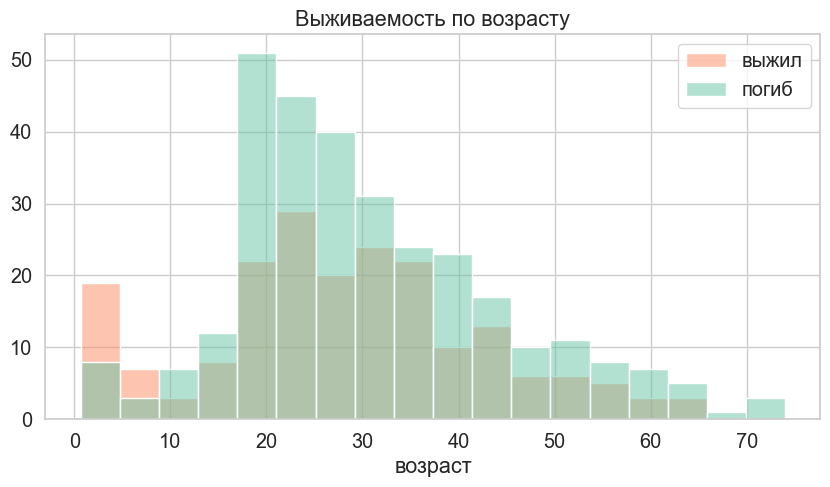

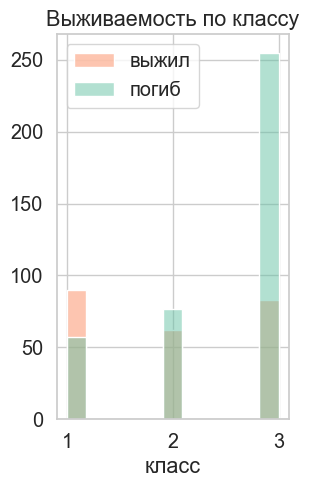

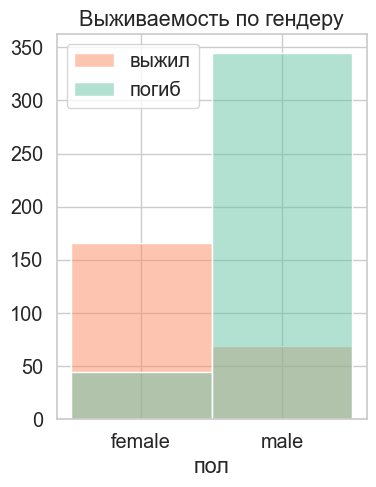

     доля погибших  доля выживших
пол                              
жен       0.209524       0.790476
муж       0.833333       0.166667


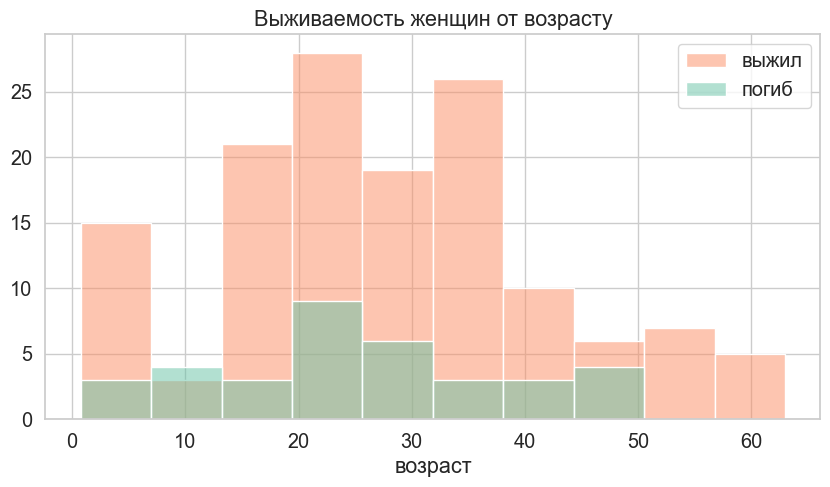

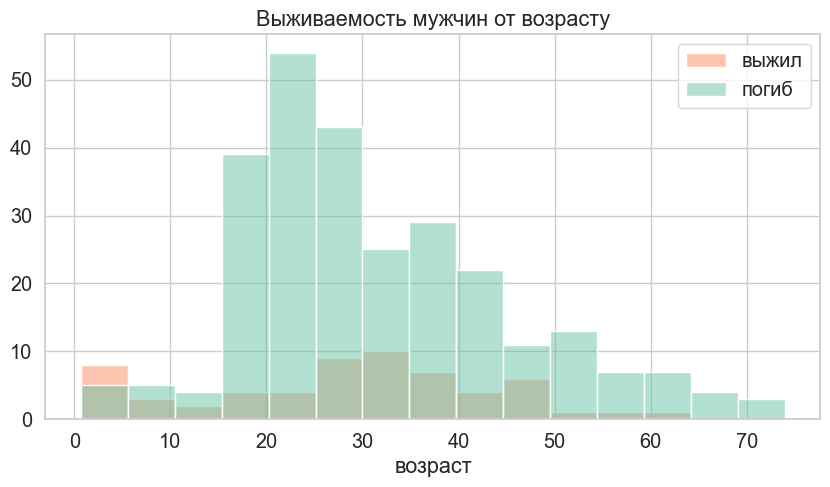

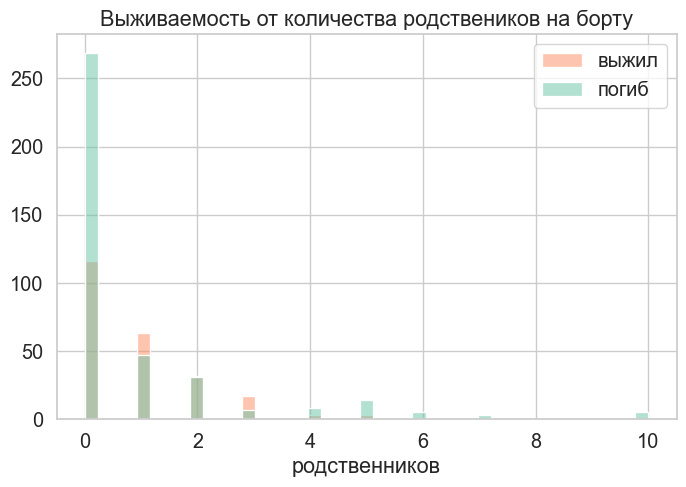

                   доля погибших  доля выживших
родных у человека                              
0                       0.698701       0.301299
1                       0.427273       0.572727
2                       0.492063       0.507937
3                       0.291667       0.708333
4                       0.727273       0.272727
5                       0.823529       0.176471
6                       0.833333       0.166667
7                       1.000000       0.000000
10                      1.000000       0.000000


In [37]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(10, 5))
    sns.histplot(data=study, x='Age', hue=study_target)
plt.title('Выживаемость по возрасту')
plt.xlabel('возраст')
plt.ylabel('')
plt.legend(['выжил', 'погиб'])
plt.show()

with sns.axes_style('whitegrid'):
    plt.figure(figsize=(3, 5))
    sns.histplot(data=study, x='Pclass', hue=study_target)
plt.title('Выживаемость по классу')
plt.xlabel('класс')
plt.ylabel('')
plt.legend(['выжил', 'погиб'])
plt.show()

with sns.axes_style('whitegrid'):
    plt.figure(figsize=(4, 5))
    sns.histplot(data=study, x='Sex', hue=study_target)
plt.title('Выживаемость по гендеру')
plt.xlabel('пол')
plt.ylabel('')
plt.legend(['выжил', 'погиб'])
plt.show()

print((pd.crosstab(index=study['Sex'], columns=study_target,
       rownames=['пол'], colnames=[''], margins=False,
       normalize='index')).rename(index={'female': 'жен', 'male': 'муж'},
                                  columns={0: 'доля погибших', 1: 'доля выживших'}))

with sns.axes_style('whitegrid'):
    plt.figure(figsize=(10, 5))
    sns.histplot(
        data=study[study['Sex'] == 'female'], x='Age', hue=study_target)
plt.title('Выживаемость женщин от возрасту')
plt.xlabel('возраст')
plt.ylabel('')
plt.legend(['выжил', 'погиб'])
plt.show()

with sns.axes_style('whitegrid'):
    plt.figure(figsize=(10, 5))
    sns.histplot(
        data=study[study['Sex'] == 'male'], x='Age', hue=study_target)
plt.title('Выживаемость мужчин от возрасту')
plt.xlabel('возраст')
plt.ylabel('')
plt.legend(['выжил', 'погиб'])
plt.show()

with sns.axes_style('whitegrid'):
    plt.figure(figsize=(8, 5))
    sns.histplot(
        data=study, x=study['SibSp'] + study['Parch'], hue=study_target)
plt.title('Выживаемость от количества родствеников на борту')
plt.xlabel('родственников')
plt.ylabel('')
plt.legend(['выжил', 'погиб'])
plt.show()

print((pd.crosstab(index=study['SibSp'] + study['Parch'],
                   columns=study_target, rownames=['родных у человека'],
                   colnames=[''], margins=False, margins_name='всего',
                   normalize='index')).rename(columns={0: 'доля погибших',
                                                       1: 'доля выживших'}))

На графиках видно, что выжили по большей части мальчики в возрасте до 7 лет, девочки от 6 до 12, а также пожилые люди старше 75 лет(очевидно, люди из дополняющего большинства спасали перечисленных, но не спаслись сами).

Также отчётливо видно, что большая часть пассажиров первого класса выжили, в отличие от пассажиров других двух.

#### 3. Классификация

На основе проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики.

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

**Дерево 1:**

...

**Дерево 2:**

...

Реализуйте полученные деревья по шаблону

In [38]:
def tree_1(features):
    '''
    Описанные после построенных графиков группы людей с наибольшим показателем выживаемости
    '''
    girl = (features.Sex == 'female') & ((features.Age - 6) * (features.Age - 12) > 0) # девочки
    boy = (features.Sex == 'male') & (features.Age < 7) # мальчики
    predicted = girl | boy | (features.Age > 75) # девочки/мальчики/пожилые
    return predicted.replace({True: 1, False: 0})


def tree_2(features):
    '''
    Большая часть пассажиров первого класса выжили
    '''
    predicted = (features.Pclass == 1).replace({True: 1, False: 0})
    return predicted

#### 4. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**

<b><font color="orange">Доля верно предсказанных данных(то есть отношение количества верно предсказанных к общему количеству</font></b>

Реализуйте данный критерий по шаблону

In [39]:
def criteria(target, predicted):
    сomparison = (target == predicted).replace({True: 1, False: 0})
    return сomparison.sum() / target.count()

Посчитайте качество полученных ранее деревьев.

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [40]:
print(criteria(test_target, tree_1(test)))

print(criteria(test_target, tree_2(test)))

0.7340823970037453
0.6853932584269663


**5. Метод ближайшего соседа**

В домашнем задании 1 вы уже реализовали функцию поиска ближайших соседей. Теперь давайте применим ее для решения нашей текущей задачи. 

Реализуйте функцию, которая для каждого объекта тестового набора данных найдет $k$ ближайших соседей из обучающего набора данных, и в качестве ответа возьмет наиболее часто встречающееся значение целевого признака среди найденных соседей. Обратите внимание, что соседей необходимо искать только среди объектов обучающего набора данных.

Посчитайте значение предложенного ранее критерия качества для метода ближайшего соседа для значений $k$ от 1 до 10. Постройте график зависимости критерия качества от $k$. Как вы можете пояснить полученные результаты?

#### 6. Выводы

Построив графики, а затем, основываясь на зависимостях ими представлеными, организуется тривиальное по своей сложности дерево глубины 2, которое, на мой взгляд, даёт неплохую точность предсказания данных. Разумеется, чем больше общих признаков(таких как пол, возраст, класс пассажира) совпадают у пары людей, тем с большей уверенностью можно утверждать, что они либо оба выжили, либо оба погибли. 